1.Importing


In [ ]:
!pip install newsapi-python

In [ ]:
!pip install yfinance

In [ ]:
import nltk#for NLP
nltk.download('vader_lexicon')#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from newsapi import NewsApiClient
from datetime import date,timedelta,datetime

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [ ]:
pd.set_option('display.max_colwidth',100)

2)Obtain an access key for the NewsAPI

In [ ]:
# Init news api
NEWS_API_KEY = '2adc9646b17746ffbd42e9526c1443e1'

3) The News API example

In [ ]:
newsapi = NewsApiClient(api_key= NEWS_API_KEY)
keywrd = 'Tesla stock'
my_date = date.today() - timedelta(days=1)
# datetime.strptime('10-Apr-2021','%d-%b-%Y')

articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      #sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)

In [ ]:
articles

{'status': 'ok',
 'totalResults': 51,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'Dan DeFrancesco',
   'title': 'Some of the best early-stage startup investors share a common trait that should be a lesson for Silicon Valley',
   'description': "In today's big story, we're looking at the best investors when it comes to early-stage companies.",
   'url': 'https://www.businessinsider.com/news-today-january-12-startups-investors-tech-2024-1',
   'urlToImage': 'https://i.insider.com/65a7c49c6979d7371823d9c5?width=1200&format=jpeg',
   'publishedAt': '2024-01-17T14:12:15Z',
   'content': 'Investors are holding back a wave of pre-IPO startups last valued at lofty price tags during the pandemic era.Robert Gauthier/Los Angeles Times\r\n<ul><li>This post originally appeared in the Insider T… [+7757 chars]'},
  {'source': {'id': None, 'name': 'MarketWatch'},
   'author': 'Steve Goldstein',
   'title': 'Tesla cuts prices in Germany after reduc

4) Sentiment

In [ ]:
PHRASES = ['Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.',\
           'Wow, how things change.',\
           'Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in PHRASES:
  print(f'{phrase}')
  print(sia.polarity_scores(phrase))

Well, this week news broke that they had been in talks with Twitter for a $4 billion acquisition, so it looks like they’re still pretty desirable.
{'neg': 0.084, 'neu': 0.603, 'pos': 0.313, 'compound': 0.7624}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Traveloka are poised to become public companies in coming months, kickstarting a coming-out party for Southeast Asia’s long-overlooked internet scene.
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.5719}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


5) NEWS + Sentiment

In [ ]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):

  newsapi = NewsApiClient(api_key= NEWS_API_KEY)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(),
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(),
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()

  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])


0.16569204545454544
88
0     Hertz (previously) is selling off one third of its electrical vehicle fleet, mostly Tesla models...
1              Tesla cut the price of its Model 3 and Model Y cars, according to media reports on Friday.
2     Caught in the crossfire of Red Sea attacks, EV maker Tesla took a stock hit today (Jan. 12) afte...
3                              The merits of an equal-weight S&P 500 fund compared to a cap-weighted fund
4     Daniel George was a VP at JP Morgan and before that worked at Google X. He saved enough money to...
                                                     ...                                                 
83    (marketscreener.com) \nMicrosoft Dethrones Apple as Largest U.S. Company \n \n\n Microsoft's AI-...
84    (marketscreener.com) Volkswagen's\npassenger cars brand does not expect "significant" restrictio...
85    (marketscreener.com) \nBlackRock to Buy Global Infrastructure Partners for $12.5 Billion \n \n\n...
86    The horrible depr

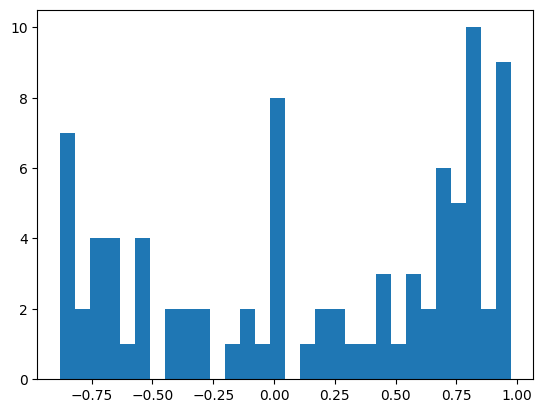

In [ ]:
dt = (datetime.now() - timedelta(days=7)).strftime("%d-%b-%Y")
return_articles = get_articles_sentiments(keywrd= 'Tesla stock', startd = dt, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)
print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)

In [ ]:
return_articles.sort_values(by='Sentiment', ascending=True)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
71,-0.8807,https://www.marketscreener.com/quote/stock/TESLA-INC-6344549/news/Tesla-Berlin-to-stop-most-outp...,(marketscreener.com) Tesla will suspend\nmost car production at its factory near Berlin from Jan...,Tesla Berlin to stop most output for two weeks due to Red Sea disruption
42,-0.8750,https://www.marketscreener.com/quote/stock/TESLA-INC-6344549/news/Hydro-says-20-workers-in-Swede...,(marketscreener.com) Norwegian aluminium maker Hydro\non Friday said 20 employees at one of its ...,Hydro says 20 workers in Sweden may lose job over Tesla union conflict


In [ ]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(2)

,Sentiment,URL,Description,Title
87,0.9738,https://www.etfdailynews.com/2024/01/12/direxion-daily-tsla-bear-1x-shares-nasdaqtsls-sees-signi...,Direxion Daily TSLA Bear 1X Shares (NASDAQ:TSLS – Get Free Report) saw a large increase in short...,Direxion Daily TSLA Bear 1X Shares (NASDAQ:TSLS) Sees Significant Increase in Short Interest
30,0.9477,https://www.etfdailynews.com/2024/01/11/blodgett-wealth-advisors-llc-boosts-stock-position-in-te...,"Blodgett Wealth Advisors LLC increased its stake in Tesla, Inc. (NASDAQ:TSLA – Free Report) by 1...","Blodgett Wealth Advisors LLC Boosts Stock Position in Tesla, Inc. (NASDAQ:TSLA)"
